<a href="https://colab.research.google.com/github/Aniket18-bot/Week-1/blob/main/ewaste_week1_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🗑️ E-Waste Image Classification -

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aniketredekar","key":"aace9d4896a37c20dba7ea69fb0acc24"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download akshat103/e-waste-image-dataset

Dataset URL: https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset
License(s): apache-2.0
  0% 0.00/11.8M [00:00<?, ?B/s]
100% 11.8M/11.8M [00:00<00:00, 938MB/s]


In [ ]:
!unzip e-waste-image-dataset.zip -d e-waste-image-dataset

Archive:  e-waste-image-dataset.zip
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_106.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_128.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_148.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_152.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_174.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_177.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_190.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_192.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_211.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_22.jpg  
  inflating: e-waste-image-dataset/modified-dataset/test/Battery/battery_24.jpg  
  inflating: e-waste-image-dataset/modified-dataset/t

In [ ]:
import os


data_dir = "e-waste-image-dataset/modified-dataset"
print("Root contains:\n", os.listdir(data_dir))


sample_subfolder = os.path.join(data_dir, "train")
print("\nContents inside train:\n", os.listdir(sample_subfolder)[:10])

Root contains:
 ['train', 'val', 'test']

Contents inside train:
 ['Battery', 'Mobile', 'Keyboard', 'Washing Machine', 'Printer', 'Mouse', 'PCB', 'Television', 'Player', 'Microwave']


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Set paths for train, val, test directories
base_path = "e-waste-image-dataset/modified-dataset"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")
test_path = os.path.join(base_path, "test")

# Load datasets
img_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

test_ds = image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

# Print class names
class_names = train_ds.class_names
print("\nClasses:", class_names)

Found 2400 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 300 files belonging to 10 classes.

Classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


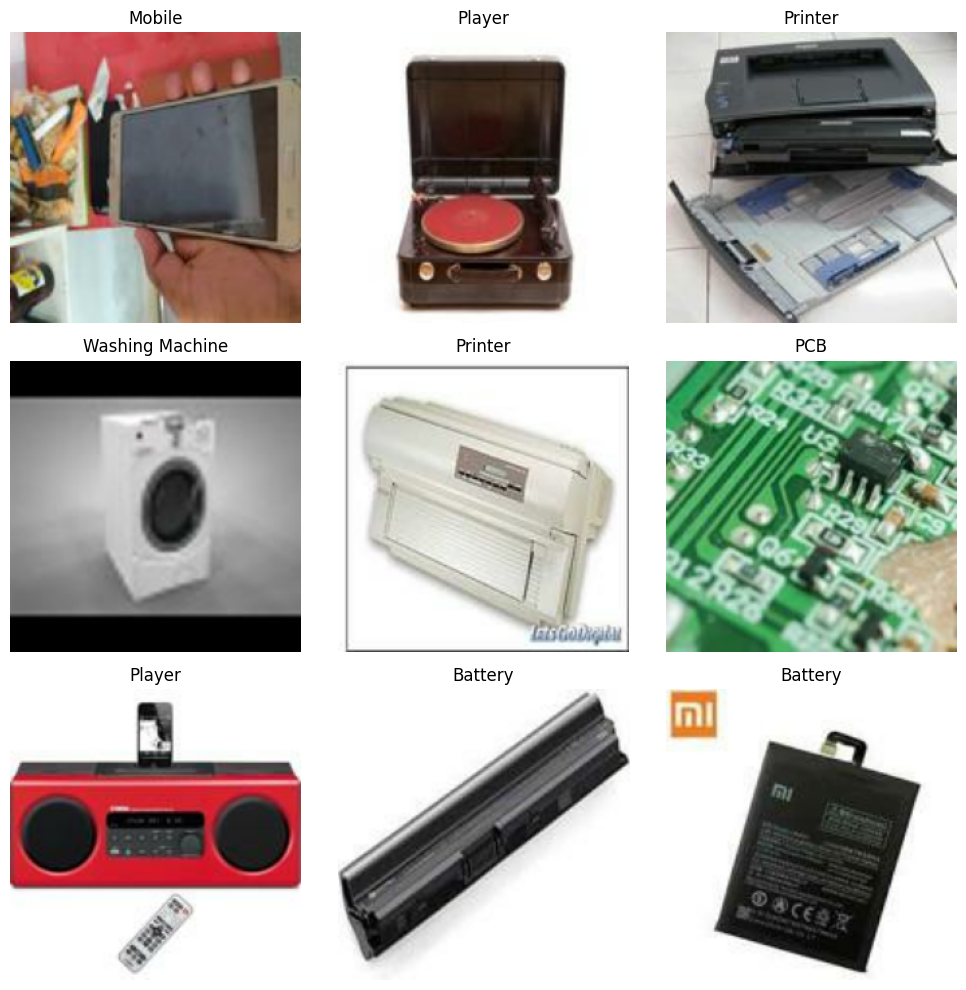

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.tight_layout()
plt.show()